# Integration

Integration in numerical analysis deals with computing numerically integrals of general function using interpolatory quadrature rules: 
 
$$\int_{a}^{b}f(x)dx \sim \sum_{i=0}^{n-1}I^{n-1}(f) = \sum_{i=0}^{n-1}\int_{a}^{b}f(q_i) l_i(x)dx =
\sum_{i=0}^{n-1}f(q_i)\,w_i$$
$\newline$
where:
$$w_i  := \int_{a}^{b}l_i(x)dx $$
$\newline$
The role of the interpolatory points $\,\{q_i\}_{i=0}^{n-1}\,$ is foundamental if we want to obtain the best degree of accuracy. For instance, we will see that the use of equispace points, gauss-leggendre points and chebyshev points lead to different errors when comparing the same type of integration.
## Gauss quadrature rule
If $\{l_i(x)\}_{i=0}^{n-1}$ are the $n\,$ Lagrangian basis functions of order $n-1\,$ for the roots of the Legendre polynomials of order $n\,$, then we are using the Gauss quadrature rule. Gauss quadrature rule is important because maximize the degree of accuracy of the numerical integration.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's first start by calculating the weights of the the quadrature rule. In order to do that we need to calculate:

$$w_i  := \int_{a}^{b}l_i(x)dx \, . $$

This can be done by going through the monomial basis functions. With the monomial basis $\{v_i\}_{i = 0}^{n-1} := \{x^i\}_{i = 0}^{n-1}$, we can rewrite the lagrangian basis as:
$\newline$
$$l_i(x) = V^{ij}v_j(x) \, .$$
$\newline$
Where $V_{ij} = v_j(q_i)$ and $V^{ij} = V_{ij}^{-1}$. If we have the monomial coefficiets, we can write the integral of the monomial explicitly:
$\newline$
$$\int_a^bx^idx = \left. \frac{x^{(i+1)}}{i+1} \right|^b_a \, .$$
$\newline$
By rembembering that:
$\newline$
$$w_i(x)  := \int_{a}^{b}l_i(x)dx \, , $$
$\newline$
ones obtain:
$\newline$
$$w_i  = V^{ij}\int_{a}^{b}v_j(x)dx = V^{ij}\int_{a}^{b}x^jdx = V^{ij}\:\left. \frac{x^{(i+1)}}{i+1} \right|^b_a$$.

In [6]:
def monomial(x, i):
    '''Function which computes the i power.'''
    return x**i

def integral_of_monomials(a, b, i):
    '''Function which computes the integral between 
       the interval [a,b] of monomials of degree i.'''
    assert i >= 0
    return (b**(i+1) - a**(i+1)) / (i+1)

def weights_quadrature_rule(q, a, b):
    '''Function which computes the weights for the 
       quadrature formula. Standard input is the
       q vector of interpolation point and the 
       interval [a,b] for performing the integral'''
    Nq = len(q)
    V = np.array([monomial(q,i) for i in range(Nq)]).T
    Vinv = np.linalg.inv(V)
    W = np.array([integral_of_monomials(a,b,i) for i in range(Nq)])
    return W.dot(Vinv)

In [8]:
#Let's try what we just did...
a = -1; b = 1; N = 5   # interval defintion
q = linspace(a,b,N)    # points defintion
w = weights_quadrature_rule(q,a,b)

If I did everything correctly I should obtain the same values as the one obtain with the standard numpy function [nummpy.polynomial.legendre.leggauss](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.legendre.leggauss.html), which calculates Gauss-Legendre points.

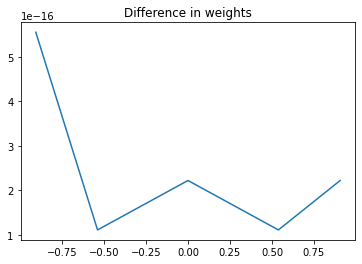

In [7]:
#Let's try what we just did...
q,w = np.polynomial.legendre.leggauss(5)
myw = weights_quadrature_rule(q,-1,1)
plt.plot(q,(w-myw))
plt.title("Difference in weights")
plt.show()

As we can see we obtain points that differ only for machine precision. It is important to note that we did not use as $q$ equilly spaced points (as in the first "#Let's try what we just did..."). This is because the $q$ are the roots of the Legendre polynomials of order $n\,$. We can construct Legendre function using recursion by using:
$$(n+1)\,l_{n+1}(x) = (2n+1)\,x\,l_{n}(x)-n\,l_{n-1}(x) \qquad l_0 = 1; \; l_1 = x$$

The zeros of the legendre function can be calculated using Bisection method or Newton method. In what follows, we show only how to build legendre basis.

In [10]:
def build_legendre_basis(n):
    """
    This function takes one number n, and returs a matrix M
    such that M[i, j] is the evaluation of the polynomial l_i on the points 
    x_j
    """
    x = linspace(-1,1,1000)
    n_evaluation_points = x.shape[0]
    M = zeros((n_evaluation_points, n), dtype = float64)
    
    M[:,0] = 1
    M[:,1] = x
    for k in range(2,n,1):
        M[:,k] = (M[:,k-1]*x*(2*n+1) - n*M[:,k-2])/(n+1)
    return M

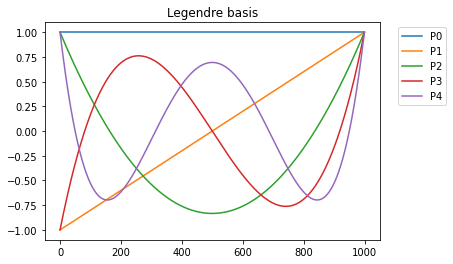

In [11]:
#Let's try what we just did...
n = 5
Legendre = build_legendre_basis(n)
plt.plot(Legendre) 
plt.title("Legendre basis")
arr_lengend = ["P"+ str(i) for i in range(n+1)]
plt.legend(arr_lengend,bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

Let's compute now the quadrature rule integration. Note that we want to make a general function, i.e. the points we are passing for integration can be general, and not only the zeros of the Legendre functions!

In [14]:
def quadrature_integration(function,q,a,b):
    '''Function that computes numerically, by using
       the quadrature rule, the integral between 
       [a,b] of a function evaulated at point q'''
    w = weights_quadrature_rule(q, a, b)
    return np.inner(w, function(q))

In [22]:
#Let's try what we just did...
function = np.sin
a = 0; b = pi
q = linspace(a, b, 10)
Integral = quadrature_integration(function,q,a,b)
print("Numerical integral is: ",Integral)
print("Real integral is: ",2.0)

Numerical integral is:  1.9999998954711824
Real integral is:  2.0


We want to analyse now the error we compute we integrating with different evaluation points. We are going to use Chebyshev points (see [numpy.polynomial.chebyshev.chebgauss](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebgauss.html)) , equispaced points and Gauss-Legendre points. 

First of all lets rescale the Chebyshev and Gauss Legendre points (default calculation us the interval $[-1,1]$.

In [25]:
def scale_gauss(a,b,N):
    qg, wg = np.polynomial.legendre.leggauss(N)
    qg = (qg+1)*(b-a)/2+a
    return qg, weights_quadrature_rule(qg,a,b)

def scale_cheby(a,b,N):
    qc, wc = np.polynomial.chebyshev.chebgauss(N)
    qc = (qc+1)*(b-a)/2+a
    
    return qc, weights_quadrature_rule(qc,a,b)

Let's now define the error function for the three different interpolation points.

In [39]:
def Integration_Error(f,a,b,n,expected):
    equi = []
    gauss = []
    cheby = []
    
    for N in range(1,n):
        q = np.linspace(a,b,N)
        qc, wc = scale_cheby(a,b,N)
        qg, wg = scale_gauss(a,b,N)
        
        equi.append(quadrature_integration(f,q,a,b))
        cheby.append(quadrature_integration(f,qc,a,b))
        gauss.append(quadrature_integration(f,qg,a,b))
        
    plt.semilogy(range(1,n), np.abs(np.array(equi) - expected))
    plt.semilogy(range(1,n), np.abs(np.array(cheby) - expected))
    plt.semilogy(range(1,n), np.abs(np.array(gauss) - expected), "red")
    plt.legend(["Equispaced", "Chebyshev", "Gauss"],bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title("Integration error")
    plt.show()

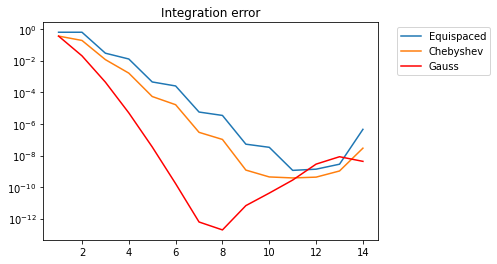

In [43]:
#Let's try what we just did...
def my_func1(x):
    # the expected integral in [0,1] is 2/pi
    return np.sin(x * np.pi)

Integration_Error(my_func1, 0, 1, 15, 2/np.pi)

Note that Gauss points are the one performing the best (at least till $\sim 10$ points are used). What happens with a function which is not $C^\infty$?

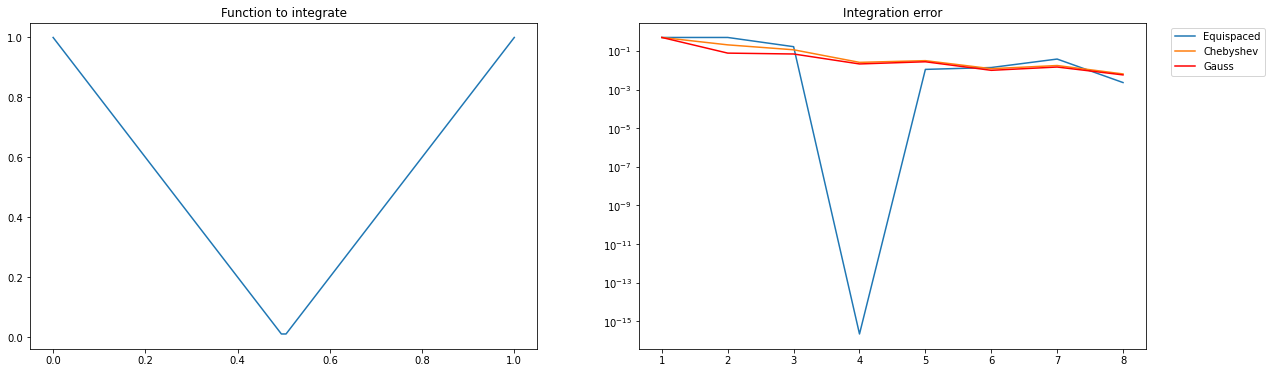

In [102]:
#Let's try what we just did...
def my_func2(x):
    # the expected integral in [0,1] is 0.5
    return 2*np.abs(x-.5)

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Function to integrate")
plt.plot(np.linspace(0,1,100),my_func2(np.linspace(0,1,100)))

plt.subplot(1,2,2)
Integration_Error(my_func2, 0,1, 9, 0.5)

Note that the integral is exact in $N=3$ since $\bf{by\space chance}$ we got the right three quadrature points which gave us the results. What happens if we increase the number of interpolation points?

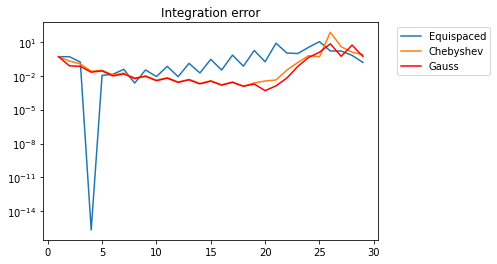

In [42]:
#Let's try what we just did...
Integration_Error(my_func2, 0,1, 30, 0.5)

As you can see the error explodes. This is due to two reasons: firstly as the points increases the calculation of the inverse of the matrix leads to numerical error. In the second place, we have an error due to summation error when the number of weights increases as it can be seen in the next plots.

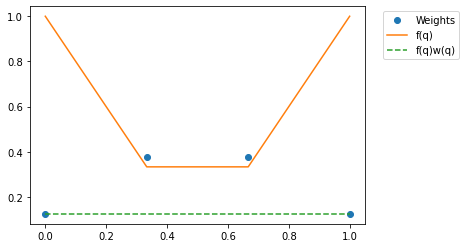

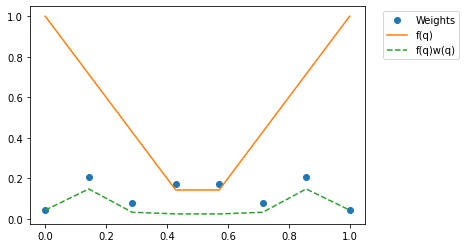

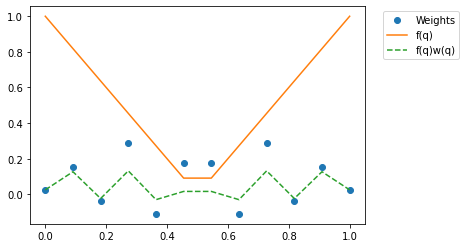

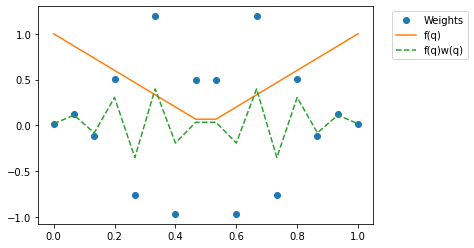

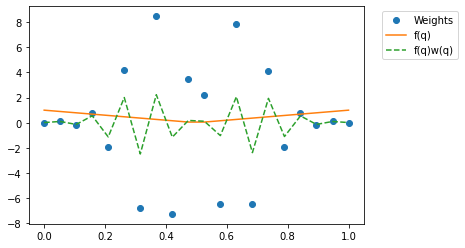

<Figure size 432x288 with 0 Axes>

In [142]:
for N in range(4,23,4): 
    q = linspace(0,1,N)
    w = weights_quadrature_rule(linspace(0,1,N), 0, 1)
    plt.plot(q, w, 'o', label = "Weights")
    plt.plot(q, my_func2(q), '-', label = "f(q)")
    plt.plot(q, my_func2(q)*w, '--', label = "f(q)w(q)")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.figure()
